In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## importing the eigen vector from scio=py
from scipy.linalg import eig
## import the eigen vector from numpy
from numpy.linalg import eig

In [3]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [4]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [6]:
df = pd.DataFrame(data,columns=['Math','Bio'])

In [7]:
df

,Math,Bio
0,3,4
1,2,8
2,6,9
3,10,12


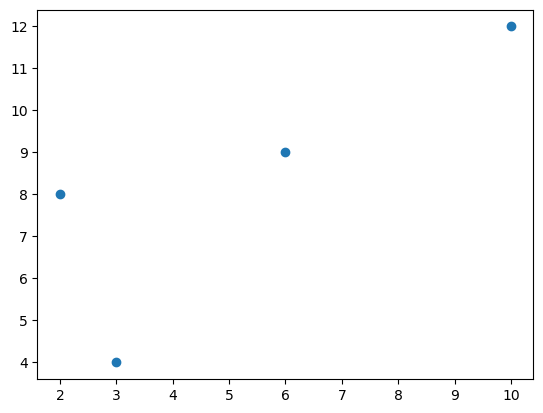

In [8]:
plt.scatter(df.Math,df.Bio)

<Axes: >

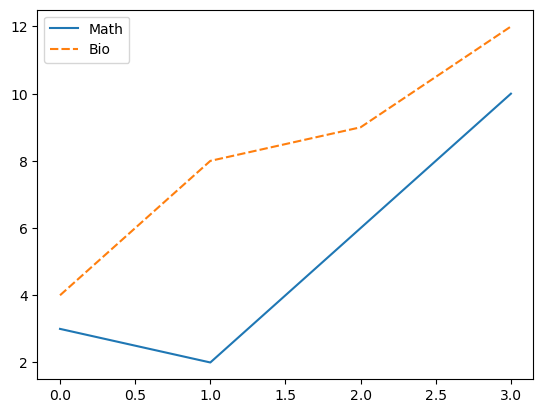

In [12]:
sns.lineplot(df)

## PCA steps:
1. Standarization of the data
2. Find coveriance matrixfrom the data
3. eigen value and eigen vector of the data
4. Find the principel of component

In [16]:
## Mean by columns
mean_cols = df.mean(axis=0)

In [17]:
mean_cols

Math    5.25
Bio     8.25
dtype: float64

In [19]:
mean_cols = np.mean(data,axis=0)

In [23]:
mean_cols

array([5.25, 8.25])

In [25]:
## Standrization, means that mean = 0 and varience =1
scaled_data = data - mean_cols

In [26]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [29]:
std_cols = np.std(data,axis=0)

In [30]:
std_cols

array([3.1124749 , 2.86138079])

In [35]:
scaled_data = scaled_data / std_cols

In [36]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

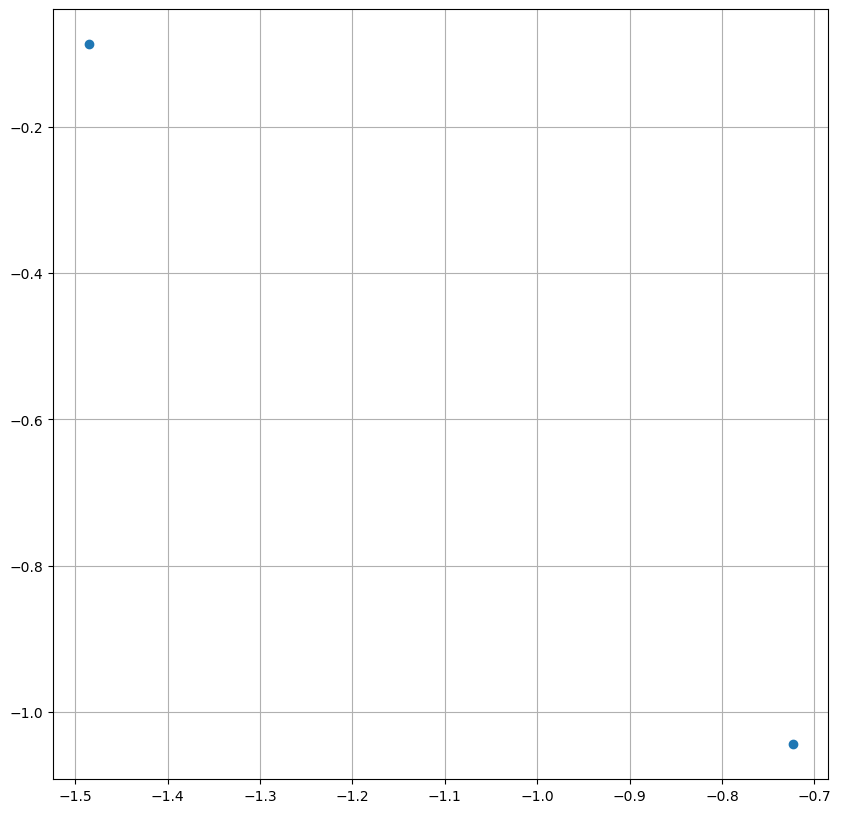

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(scaled_data[0],scaled_data[1])
plt.grid(True)

In [38]:
scaled_data.T

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

In [40]:
cov_mat = np.cov(scaled_data.T)

In [41]:
cov_mat

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

In [74]:
eigen_values,eigen_vectors = eig(cov_mat)

In [75]:
## eigen values of lambda1, lambda2
eigen_values

array([2.40938985, 0.25727682])

In [76]:
## eigen vectors
eigen_vectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [77]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [79]:
eigen_vectors 

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [84]:
eigen_vectors.T

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [86]:
 scaled_data.T

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

In [88]:
eigen_vectors.T.dot(scaled_data.T)

array([[-1.56142916, -0.80013059,  0.35572917,  2.00583058],
       [-0.53909786,  0.67657018,  0.01495207, -0.15242439]])

In [83]:
eigen_vectors.T.dot(scaled_data.T).T


array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [32]:
## By using the StandardScaler module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [33]:
scaler.fit(df)

StandardScaler()

In [34]:
scaler.transform(df)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [69]:
from sklearn.decomposition import PCA
pca=PCA()

In [70]:
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [89]:
pd.DataFrame(data=pca.fit_transform(scaled_data),columns=['PC1','PC2'])

,PC1,PC2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [90]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [91]:
sum(pca.explained_variance_ratio_)

1.0

In [94]:
df=pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")


In [95]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [101]:
df = df.drop(["Id number"],axis=1)

In [102]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [104]:
scaled_df = scaler.fit_transform(df)

In [106]:
scaled_df

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ...,  2.95320036,
        -0.5864509 ,  2.01047778],
       [-0.61239854,  1.19327046, -1.86551055, ...,  2.81208731,
        -0.5864509 ,  2.01047778],
       [-0.41436305,  1.00915211, -1.86551055, ...,  3.01367739,
        -0.5864509 ,  2.01047778]])

In [107]:
pca1=PCA()
pca_data = pca1.fit_transform(scaled_df)

In [108]:
pca_data

array([[-1.55407028,  0.1614642 , -0.36622253, ...,  0.1154433 ,
        -0.1935898 ,  0.01620644],
       [-0.39260231, -1.09023459, -0.53555741, ..., -0.4776274 ,
        -0.34671271, -0.01225684],
       [-0.20404462, -1.44432873, -0.54402528, ..., -0.50535693,
        -0.1623886 ,  0.02021773],
       ...,
       [ 3.82430943,  1.74206794, -0.74166392, ...,  0.07776659,
        -0.88260888,  0.04591164],
       [ 4.07957512,  0.92116565, -1.06706063, ..., -0.11214602,
         0.06945704, -0.02726013],
       [ 4.11707081,  1.17991652, -0.70618991, ..., -0.10113355,
         0.05770034, -0.01943998]])

In [110]:
pca_df = pd.DataFrame(pca_data,columns=df.columns)

In [111]:
pca_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,-1.554070,0.161464,-0.366223,1.704215,-0.258966,0.289044,-0.382241,0.115443,-0.193590,0.016206
1,-0.392602,-1.090235,-0.535557,0.793292,-0.255559,-0.018719,-0.048342,-0.477627,-0.346713,-0.012257
2,-0.204045,-1.444329,-0.544025,0.247816,-0.232830,0.249137,-0.390096,-0.505357,-0.162389,0.020218
3,-0.809947,-0.969748,-0.129626,0.409096,-0.476383,0.320338,-0.056907,-0.218879,-0.035670,0.091334
4,-0.701201,-1.185343,-0.505793,0.074198,-0.430227,0.348947,0.151081,-0.265258,-0.230024,0.001367
...,...,...,...,...,...,...,...,...,...,...
209,4.203422,1.113384,0.273666,-0.181335,0.120205,0.427099,-1.339278,-0.235861,0.170591,-0.028800
210,4.248547,1.149681,-0.910675,0.523798,0.641930,0.784685,0.568662,-0.271577,0.109981,-0.013898
211,3.824309,1.742068,-0.741664,0.051980,0.470042,1.369301,0.682405,0.077767,-0.882609,0.045912
212,4.079575,0.921166,-1.067061,-0.305282,0.533972,1.145214,0.677896,-0.112146,0.069457,-0.027260


In [113]:
pca1.explained_variance_ratio_

array([3.05559742e-01, 2.29133794e-01, 1.40942403e-01, 1.16632574e-01,
       9.14084695e-02, 5.47422471e-02, 3.69434911e-02, 1.82674245e-02,
       6.20907493e-03, 1.60779713e-04])

In [114]:
max(pca1.explained_variance_ratio_)

0.3055597415457241

In [115]:
min(pca1.explained_variance_ratio_)

0.00016077971301620462

In [116]:
sum(pca1.explained_variance_ratio_)

1.0

In [117]:
sorted(pca1.explained_variance_ratio_)

[0.00016077971301620462,
 0.006209074930117501,
 0.018267424478168683,
 0.03694349109131825,
 0.054742247066984155,
 0.09140846949352635,
 0.1166325743369082,
 0.14094240339448602,
 0.22913379394975064,
 0.3055597415457241]

In [118]:
sorted(pca1.explained_variance_ratio_,reverse=True)

[0.3055597415457241,
 0.22913379394975064,
 0.14094240339448602,
 0.1166325743369082,
 0.09140846949352635,
 0.054742247066984155,
 0.03694349109131825,
 0.018267424478168683,
 0.006209074930117501,
 0.00016077971301620462]

In [119]:
var = pca1.explained_variance_ratio_

In [120]:
np.cumsum(var)

array([0.30555974, 0.53469354, 0.67563594, 0.79226851, 0.88367698,
       0.93841923, 0.97536272, 0.99363015, 0.99983922, 1.        ])

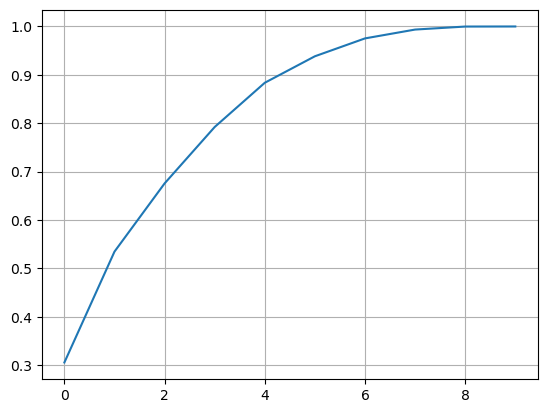

In [122]:
## From this plot we can select how much percent of data
## with respecet to how many feature are selected.
## for example if we select the 6 features(x_axis value) than we select the 95% of data.
plt.plot(np.cumsum(var))
plt.grid(True)
plt.show()